In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
_PATH_ = "https://public.minsky.cc/maria/market_channel_factors_db"

In [3]:
df = pd.read_csv(_PATH_ + "/" + "model/03ModelDataframeOfWhitePotato.csv")

In [4]:
df = df.drop(columns=['Unnamed: 0'])

In [5]:
df.columns

Index(['NOMBREDD', 'NOMBREPV', 'NOMBREDI', 'CONGLOMERADO', 'NSELUA', 'UA',
       'percentSoldProduction', 'percentFarmGateIncomes', 'percentPlantedArea',
       'districtTimeToLimaMarket', 'districtTimeToProvinceCapitalOfRegion',
       'provinceCapitalToLimaMarket', 'informalPriceInformation',
       'formalPriceInformation', 'informalMetereologicalInformation',
       'formalMetereologicalInformation', 'volumeOfDistrict', 'soldProduction',
       'yield', 'associative', 'pointsOfSale', 'marketSize',
       'localMarketChannelDirectedness', 'farmGatePricePerKg'],
      dtype='object')

# Agricultural units

In [6]:
def histogramPlot(df, variable):
    sns.set(style="white", palette="muted", color_codes=True)
    rs = np.random.RandomState(10)

    # Set up the matplotlib figure
    f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
    sns.despine(left=True)

    # Generate a random univariate dataset
    d = df[variable]

    # Plot a simple histogram with binsize determined automatically
    sns.distplot(d, kde=False, color="b", ax=axes[0, 0])

    # Plot a kernel density estimate and rug plot
    sns.distplot(d, hist=False, rug=True, color="r", ax=axes[0, 1])

    # Plot a filled kernel density estimate
    sns.distplot(d, hist=False, color="g", kde_kws={"shade": True}, ax=axes[1, 0])

    # Plot a histogram and kernel density estimate
    sns.distplot(d, color="m", ax=axes[1, 1])

    plt.setp(axes, yticks=[])
    plt.tight_layout()

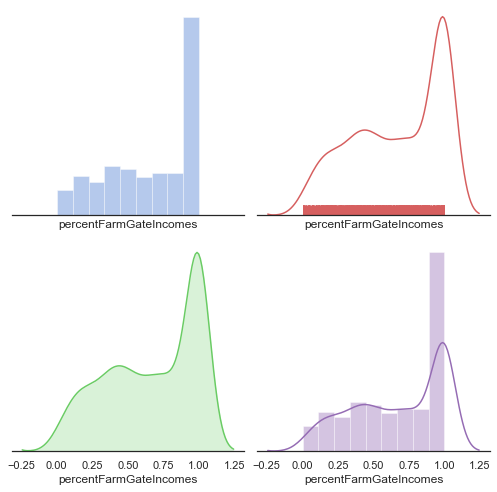

In [7]:
histogramPlot(df, "percentFarmGateIncomes")

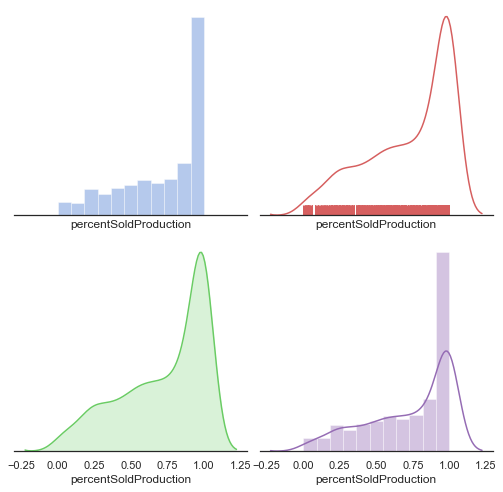

In [8]:
histogramPlot(df, "percentSoldProduction")

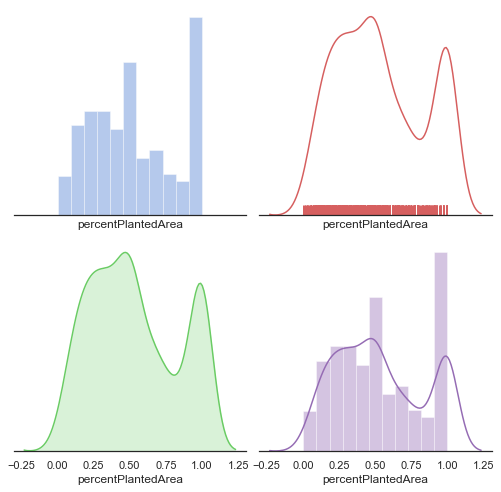

In [9]:
histogramPlot(df, "percentPlantedArea")

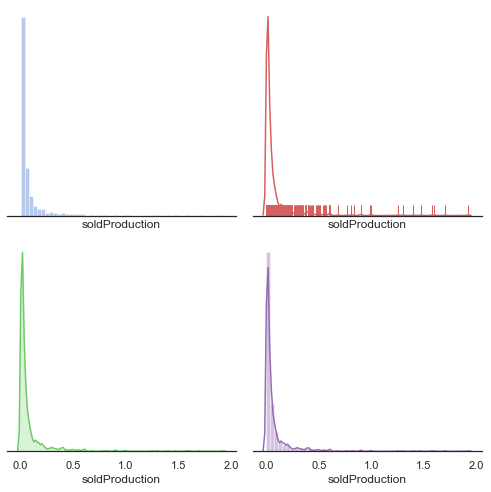

In [10]:
histogramPlot(df, "soldProduction")

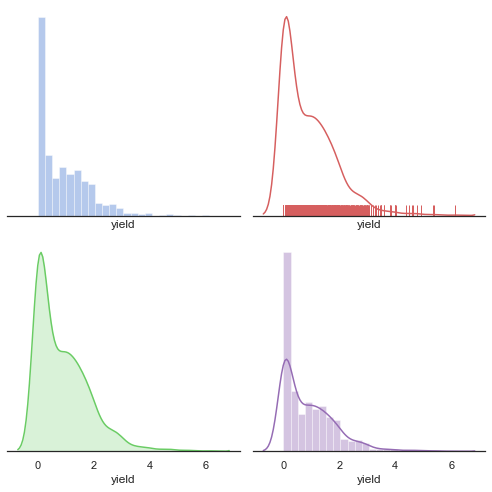

In [11]:
histogramPlot(df, "yield")

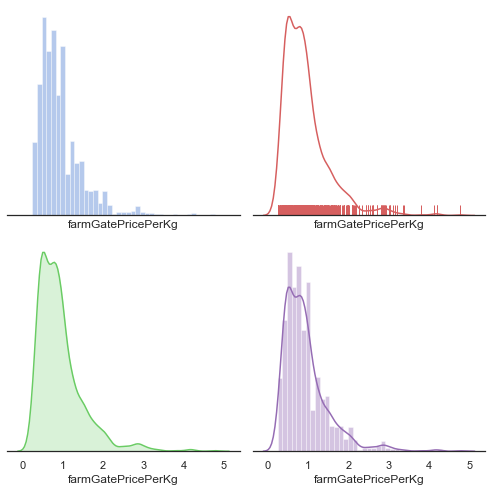

In [12]:
histogramPlot(df, "farmGatePricePerKg")

# Descriptive analysis

In [13]:
def plotingPercentageHistogram(variable, xName, yName):
    dfColumn = df[variable] * 100
    dfColumn.plot.hist(grid=True, bins=20, rwidth=0.9,
                    color='#4a4a4a')
    plt.xlabel(xName)
    plt.ylabel(yName)
    plt.rcParams["font.family"] = "serif"
    plt.grid(axis='y', alpha=0.75)

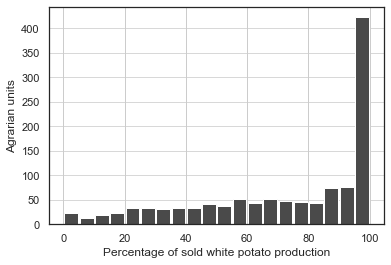

In [14]:
plotingPercentageHistogram("percentSoldProduction", "Percentage of sold white potato production", "Agrarian units")

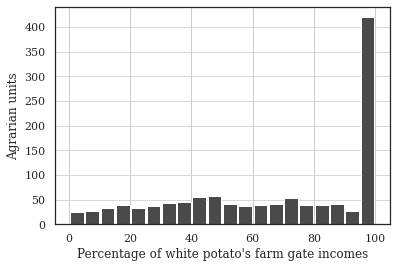

In [15]:
plotingPercentageHistogram("percentFarmGateIncomes", "Percentage of white potato's farm gate incomes", "Agrarian units")

In [16]:
df["localMarketChannelDirectednessString"] = df["localMarketChannelDirectedness"].map({1: "Collector", 2: "Wholesaler"})
df["marketSizeString"] = df["marketSize"].map({1: "Local market", 2: "Regional market", 3: "Lima markets"})

In [36]:
def boxPlotMultiple(x, y, yName, orderedList):
    ax = sns.boxplot(x=x, y=y, data=df, color='.50', order=orderedList)
    plt.xlabel("")
    plt.ylabel(yName)
    plt.rcParams["font.family"] = "serif"
    plt.grid(axis='y', alpha=0.75)

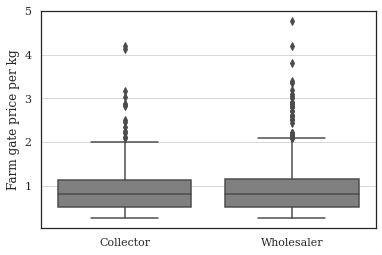

In [37]:
boxPlotMultiple("localMarketChannelDirectednessString", "farmGatePricePerKg", "Farm gate price per kg", ["Collector", "Wholesaler"])

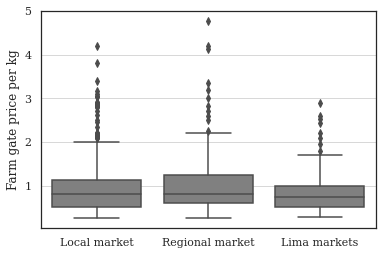

In [39]:
boxPlotMultiple("marketSizeString", "farmGatePricePerKg", "Farm gate price per kg", ["Local market", "Regional market", "Lima markets"])

In [48]:
def barPlotCountMultiple(variable, orderedList):
    ax = sns.barplot(x=df[variable].value_counts().keys(), y=df[variable].value_counts(), data=df, color='#4a4a4a', order=orderedList)
    #plt.bar(, df[variable].value_counts(), color='#4a4a4a', order=["Collector", "Wholesaler"])
    plt.xlabel("")
    plt.ylabel("Agrarian units")
    plt.rcParams["font.family"] = "serif"
    plt.grid(axis='y', alpha=0.75)

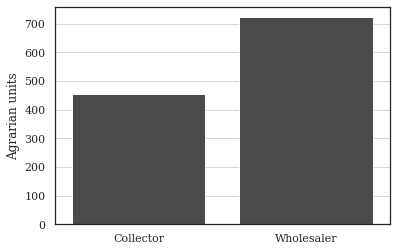

In [49]:
barPlotCountMultiple("localMarketChannelDirectednessString", ["Collector", "Wholesaler"])

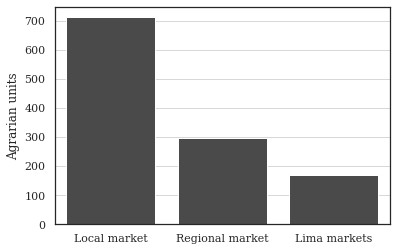

In [50]:
barPlotCountMultiple("marketSizeString", ["Local market", "Regional market", "Lima markets"])

In [23]:
df.groupby(["marketSize", "localMarketChannelDirectedness"])["farmGatePricePerKg"].mean()

marketSize  localMarketChannelDirectedness
1           1.0                               0.923549
            2.0                               0.949888
2           1.0                               0.978817
            2.0                               1.026403
3           1.0                               0.643989
            2.0                               0.867611
Name: farmGatePricePerKg, dtype: float64

In [24]:
df["farmIncomes"] = df["farmGatePricePerKg"] * df["soldProduction"] * 100000
df_mean = df.groupby(["marketSizeString", "localMarketChannelDirectednessString"]).mean()

In [25]:
# counts
df.groupby(["marketSizeString", "localMarketChannelDirectednessString"]).count()["farmGatePricePerKg"]

marketSizeString  localMarketChannelDirectednessString
Lima markets      Collector                                23
                  Wholesaler                              145
Local market      Collector                               308
                  Wholesaler                              404
Regional market   Collector                               123
                  Wholesaler                              173
Name: farmGatePricePerKg, dtype: int64

In [26]:
# soles
df_mean["farmGatePricePerKg"]

marketSizeString  localMarketChannelDirectednessString
Lima markets      Collector                               0.643989
                  Wholesaler                              0.867611
Local market      Collector                               0.923549
                  Wholesaler                              0.949888
Regional market   Collector                               0.978817
                  Wholesaler                              1.026403
Name: farmGatePricePerKg, dtype: float64

In [27]:
# in tons
df_mean["soldProduction"] * 100

marketSizeString  localMarketChannelDirectednessString
Lima markets      Collector                               10.479130
                  Wholesaler                              17.966069
Local market      Collector                                4.852092
                  Wholesaler                               5.653468
Regional market   Collector                                4.409984
                  Wholesaler                              10.075965
Name: soldProduction, dtype: float64

In [28]:
# in tons
df_mean["farmIncomes"]

marketSizeString  localMarketChannelDirectednessString
Lima markets      Collector                                8285.239130
                  Wholesaler                              19575.691034
Local market      Collector                                4267.693653
                  Wholesaler                               6046.643124
Regional market   Collector                                4780.321548
                  Wholesaler                              12091.095133
Name: farmIncomes, dtype: float64